In [11]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_table("knn_fruit.txt")

In [9]:
X=df[["mass","width","height","color_score"]]
y=df["fruit_label"]

## Univariate Analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\Admin\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


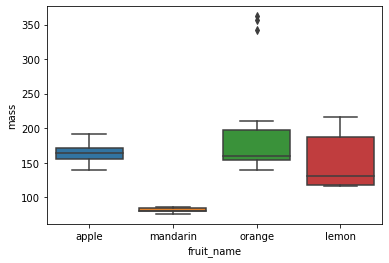

In [14]:
sns.boxplot("fruit_name","mass",data=df)

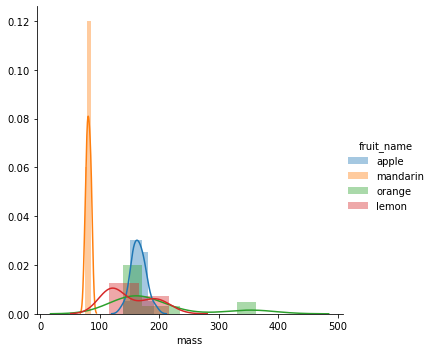

In [35]:
sns.FacetGrid(data=df,hue="fruit_name",size=5).map(sns.distplot,"mass").add_legend()

## Observation :

## Mandarin is easily seperable if we use only mass variable. Mandarin tends to have low mass

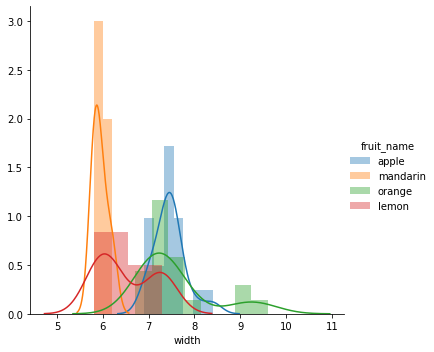

In [36]:
sns.FacetGrid(data=df,hue="fruit_name",size=5).map(sns.distplot,"width").add_legend()

## We are not able to separate anything by using width as a single feature (Lot of overlaping between classes).

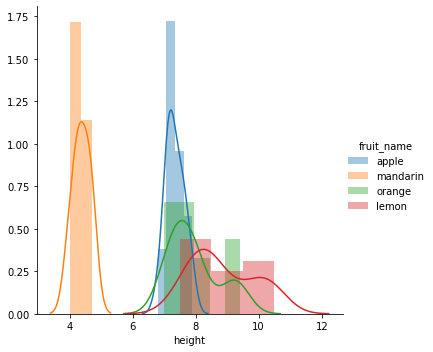

In [37]:
sns.FacetGrid(data=df,hue="fruit_name",size=5).map(sns.distplot,"height").add_legend()

## Mandarin is easily seperable using height feature. Lemon tends to have very high height as compared to other classes

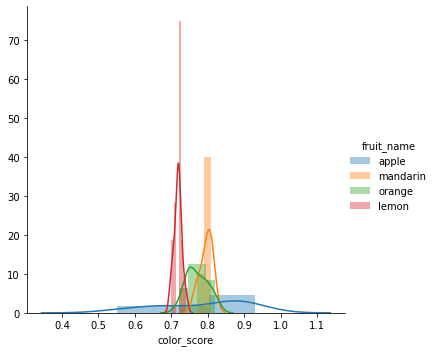

In [38]:
sns.FacetGrid(data=df,hue="fruit_name",size=5).map(sns.distplot,"color_score").add_legend()

## Bivariate Analysis

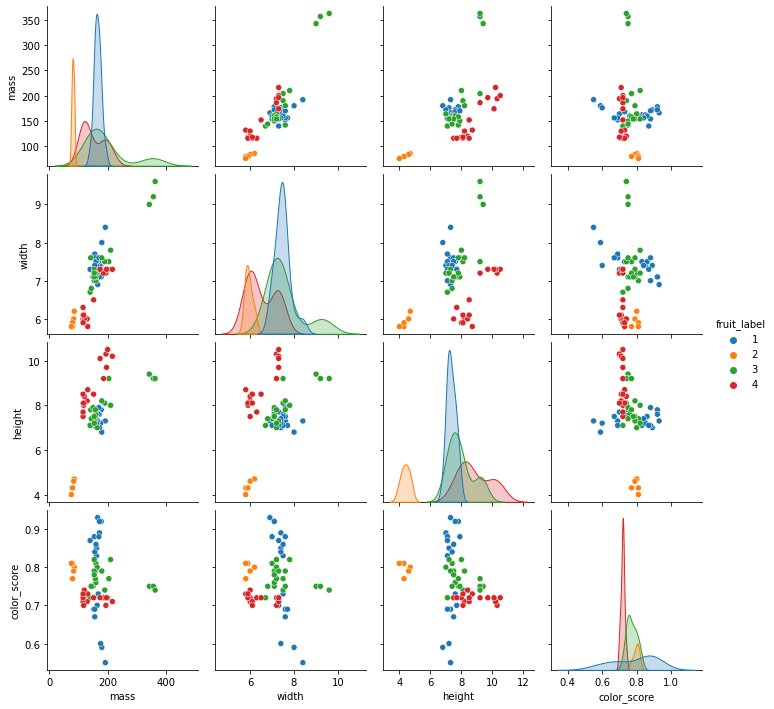

In [47]:
sns.pairplot(df,hue='fruit_label',palette="tab10")

## Combination of height and width will be a good choice to distinguish fruits

## KNN

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [57]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [63]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [92]:
ks=[]
cv_score=[]
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=3)
    print(score)
    ks.append(k)
    cv_score.append(score.mean())

[0.92857143 0.92857143 1.        ]
[0.92857143 0.92857143 1.        ]
[0.85714286 0.92857143 1.        ]
[0.85714286 0.92857143 1.        ]
[0.85714286 0.85714286 0.84615385]
[0.85714286 0.85714286 0.92307692]
[0.85714286 0.85714286 0.76923077]
[0.71428571 0.85714286 0.76923077]
[0.57142857 0.71428571 0.61538462]
[0.5        0.64285714 0.69230769]
[0.35714286 0.5        0.46153846]
[0.42857143 0.5        0.61538462]
[0.42857143 0.5        0.61538462]
[0.5        0.35714286 0.61538462]
[0.5        0.42857143 0.69230769]
[0.57142857 0.42857143 0.61538462]
[0.64285714 0.42857143 0.61538462]
[0.57142857 0.5        0.46153846]
[0.42857143 0.5        0.53846154]
[0.42857143 0.5        0.53846154]


([<matplotlib.axis.XTick at 0x22c6091cd88>,
 <a list of 20 Text major ticklabel objects>)

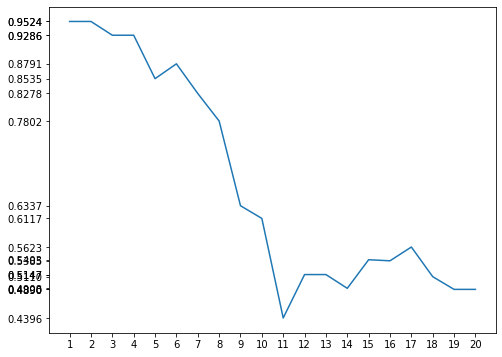

In [101]:
plt.figure(figsize=(8,6))
plt.plot(ks,cv_score)
plt.yticks(cv_score)
plt.xticks(ks)


In [102]:
print("Minimum CV_SCORE : {}".format(min(cv_score)))
print("Maximum CV_SCORE : {}".format(max(cv_score)))

Minimum CV_SCORE : 0.4395604395604396
Maximum CV_SCORE : 0.9523809523809524


In [103]:
for i in range(len(ks)):
    print("K : {}  CV_Score : {}".format(ks[i],cv_score[i]))

K : 1  CV_Score : 0.9523809523809524
K : 2  CV_Score : 0.9523809523809524
K : 3  CV_Score : 0.9285714285714285
K : 4  CV_Score : 0.9285714285714285
K : 5  CV_Score : 0.8534798534798534
K : 6  CV_Score : 0.8791208791208791
K : 7  CV_Score : 0.8278388278388279
K : 8  CV_Score : 0.7802197802197802
K : 9  CV_Score : 0.6336996336996337
K : 10  CV_Score : 0.6117216117216117
K : 11  CV_Score : 0.4395604395604396
K : 12  CV_Score : 0.5146520146520147
K : 13  CV_Score : 0.5146520146520147
K : 14  CV_Score : 0.4908424908424909
K : 15  CV_Score : 0.5402930402930403
K : 16  CV_Score : 0.5384615384615384
K : 17  CV_Score : 0.5622710622710623
K : 18  CV_Score : 0.510989010989011
K : 19  CV_Score : 0.48901098901098905
K : 20  CV_Score : 0.48901098901098905


## So for k=1 error is minimum but we know it is overfitting so we take k=5 (odd number value)

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid={'n_neighbors':np.arange(50)}

In [107]:
knn1=KNeighborsClassifier()

In [108]:
knn_grid=GridSearchCV(knn1,param_grid,cv=5)

In [109]:
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [110]:
knn_grid.best_score_

0.9527777777777778

In [112]:
knn_grid.best_params_

{'n_neighbors': 2}